In [2]:
pip install -U scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [28]:
# import quandl
import pandas as pd
import numpy as np
import datetime
from math import sqrt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# df = quandl.get("WIKI/AMZN")
df = pd.read_csv('bitcoin_price.csv', parse_dates=['Date'],)
df=df.iloc[::-1]
df.index = df['Date']
del df['Date']
df.info()
df = df[['Close']]
print(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1655 entries, 2013-04-28 to 2017-11-07
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1655 non-null   float64
 1   High        1655 non-null   float64
 2   Low         1655 non-null   float64
 3   Close       1655 non-null   float64
 4   Volume      1655 non-null   object 
 5   Market Cap  1655 non-null   object 
dtypes: float64(4), object(2)
memory usage: 90.5+ KB
              Close
Date               
2017-11-03  7207.76
2017-11-04  7379.95
2017-11-05  7407.41
2017-11-06  7022.76
2017-11-07  7144.38


In [8]:
df.head()

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


In [16]:
df = df[['Close']]

forecast_out = int(30)

df['Prediction'] = df[['Close']].shift(-forecast_out)

X = np.array(df.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(df['Prediction'])
y = y[:-forecast_out]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression()
clf.fit(X_train,y_train)

confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

C:\Users\ddola\AppData\Local\Temp\ipykernel_24724\342806010.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1))


confidence:  0.8807718279581067
[5867.77719538 5880.17000913 5935.47154214 6706.67248889 6955.64747339
 7185.0823343  6994.1559358  7053.07462908 6903.81393942 6885.39252519
 7031.85644144 7408.401584   7433.4482437  7404.63526247 7307.55614969
 6805.77770863 7084.41092144 7275.87181442 7121.82553469 7087.25741527
 7585.40626594 7556.41926325 7976.39518943 8347.94343016 8734.75583868
 8895.42736388 9109.46132584 9143.59439162 8665.4704386  8816.64536429]


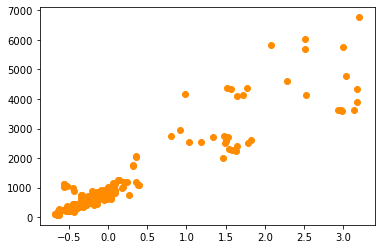

In [17]:
import matplotlib.pyplot as plt
# print(X_test)
# print(y_test)
# plt.plot(X_test,forecast_set,color='blue', linewidth=1)
plt.scatter(X_test, y_test, color='darkorange', label='data')
# plt.plot(X_test, y_test, color='darkorange', linewidth=1)
# plt.plot(X_test, forecast_prediction, color='blue', linew/idth=2)
plt.show()

In [33]:
clf.score(X_test,y_test)


0.8807718279581067

In [19]:
# dict_new = {
#     'Date': X_train,
#     'Close': y_train
# }
# df1=pd.DataFrame(dict_new).set_index('Date')
# df1

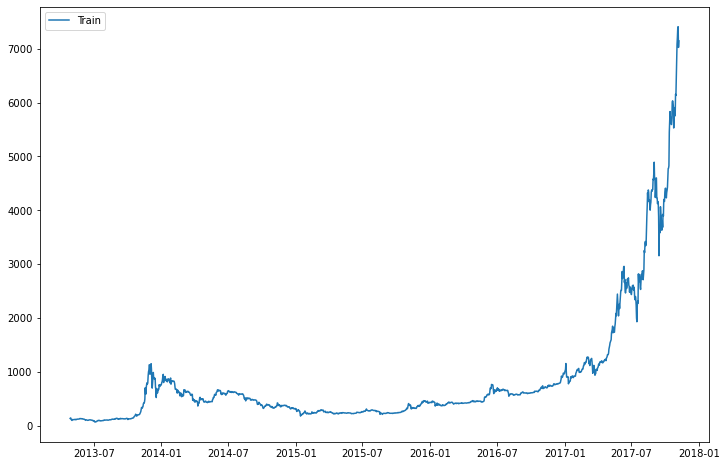

In [20]:
plt.figure(figsize=(12,8))
plt.plot(df['Close'], label='Train')
# plt.plot(X_test['Close'], label='Test')
# plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.avg_forecast))
print(rms)